#### Description of the data set :
The description is as follows:
1. Radius : It is the distance from the centre to the points on the perimeter
2. Texture : It is found out by calculating the variance of the grey scale values in the component pixel
3. Perimeter : It is the total distance between the snake points .
4. Area :The sum of the  total number of pixels in the interior of the snake  and half of the pixels in the perimter.
5. Compactness : Calculated using the formula perimeter*perimeter / area.
6. Smoothness : It is the difference between the length of the radial line and the mean length of the lines surrounding it.
7. Concavity : These are the indentations in the cell nucleus.It is used to judge the shape of the cell.
8. Concave Points : It is the measure of the number of indentations in the cell nucleus.
9. Symmetry : Calculated by measuring the longest chord in the nucleus and then calculating the length difference between lines perpendicular to the major axis to the cell boundry in both the cellular directions.
10. Fractal Dimentions : It Is calculated using the Coastline Approximations i.e. dimensions along the edges of the cell nucleus to judge the amount of malignancy.

In [1]:
# import all the relevant libraries
import pandas as pd #to create dataframes
import numpy as np #to make arrays
import sklearn
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# read the data set
data = pd.read_csv('wdbc_data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.shape

(569, 32)

In [4]:
#total number of cases present in the data set
size = len(data)
#total number of fratures present in the data set
feat = data.shape[1]-1

print("the total number of cases are {}".format(size))
print("The total number of features are {}".format(feat))

the total number of cases are 569
The total number of features are 31


In [5]:
#drop ID as it is not required

del data[0]
#check that dropped
data.head(1)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [6]:
data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#rename all the columns,according to the given labes in the  template.
data.columns = ['Diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concavepoints_mean','symmetry_mean','fractal_dimention_mean',
                'radius_error','texture_error','perimeter_error','area_error','smoothness_error','compactness_error','concavity_error','concavepoints_error','symmetry_error','fractal_dimention_error',
                'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concavepoints_worst','symmetry_worst','fractal_dimention_worst']
                

In [8]:
#convert diagnosis column to numerical value for data exploration, malignant to +1 positive class
# benign to negative class -1.
data['Diagnosis'] = data['Diagnosis'].map({'M':1,'B':-1})

In [9]:
#display a few rows to see that labels have been changed
data.head(25)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimention_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


# Split into train and test

In [10]:
#split the data into training and testing data as mentioned in the brief 
#number of trainind samples is 300
data_train = data[0:300]
#number of testing samples is 269
data_test = data[300:569]


In [11]:
#get the shape of the training and testing data set.
print('Train shape', data_train.shape)
print('Test shape', data_test.shape)

Train shape (300, 31)
Test shape (269, 31)


In [12]:
#extracting the relevant columns
#get the training data
#label
y_train = data_train.iloc[:,0]
#features
x_train = data_train.iloc[:,1:31]
#get the testing data 
#label
y_test = data_test.iloc[:,0]
#features
x_test = data_test.iloc[:,1:31]



In [13]:
# convert the training and testing data sets to numpy arrays 
# inorder to perform predicrtions.
# convert train data into numpy arrays.
x_train = np.array(x_train, dtype=int)
y_train = np.array(y_train, dtype=int)
# convert testing data into numpy arrays
x_test = np.array(x_test, dtype=int)
y_test = np.array(y_test, dtype=int)

## Exploratory Data Analysis.

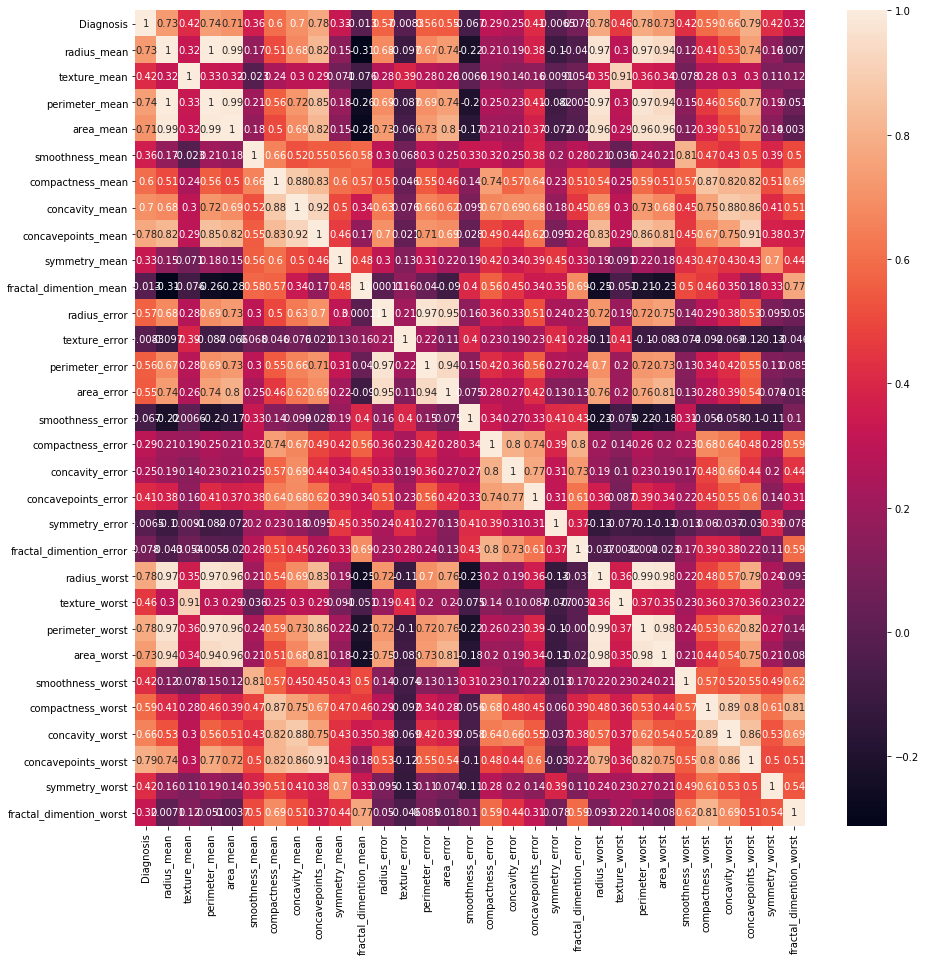

In [14]:
#see correlation by plotting the correlation matrix
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax,annot = True)

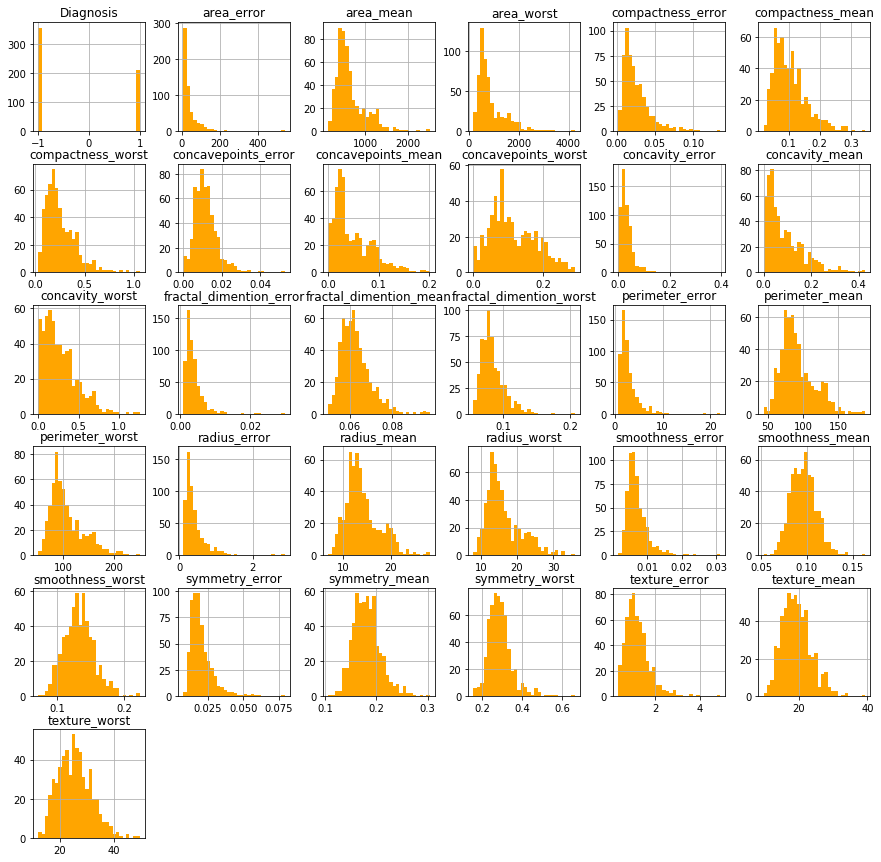

In [15]:
#plot the histogram using the hist keyword and display the findings.
data.hist(bins = 30, figsize=(15,15), color='orange')   #assign the size of histogram
plt.show()  

## Create AdaBoost Classifier

In [16]:
#set theflag value
def I(flag):
    return 1 if flag else 0
#get the absolute value of the sign
def sign(x):
    return abs(x)/x if x!=0 else 1   

In [17]:
#create the class adaboost
class Boost:
    # make a method and pass the number of estimators
    def __init__(self,n_estimators=50):
        #create instance of the n_estimators
        self.n_estimators = n_estimators
        #create a model and pass the number of estimators
        self.models = [None]*n_estimators
    
    # create the fit method and pass the labes and features
    def fit(self,x,y):
        #convert features into a numpy array
        x = np.float64(x)
        # get the length of the labels
        N = len(y)
        #initialize the weights
        weight = np.array([1/N for i in range(N)])
        #reshape the labels 
        y = np.reshape(y, 300)
        
        
         #create the decision stump
        for t in range(self.n_estimators):
            #creating the stump criterion is gini and depth is 1
            stump = DecisionTreeClassifier(criterion="gini",max_depth=1)\
                        .fit(x,y,sample_weight=weight).predict
             #calculate the error of each stump.           
            error = sum([weight[i]*I(y[i]!=stump(x[i].reshape(1,-1))) \
                        for i in range(N)])/sum(weight)
            #calcute the performance or sinificance of each stump
            alpha = np.log((1-error)/error)
            # update the weight of the stump that has higher significance
            weight = [weight[i]*np.exp(alpha*I(y[i]!=stump(x[i].reshape(1,-1))))\
                     for i in range(N)] 
            
            #update the model with the new stumps and significance
            self.models[t] = (alpha,stump)
    # make the predict method
    def predict(self,x):
        #initialize the labels
        y = 0
        #do predictions 
        for t in range(self.n_estimators):
            #fit the model with the stump and significance value
            alpha,stump = self.models[t]
            #get predictions
            y += alpha*stump(x)
        now_sign = np.vectorize(sign)
        #the pridictions can either be positive or negative
        y = np.where(now_sign(y)==-1,-1,1)
        return y

In [18]:
#fit the adaboost classifier with the number of estimators
first_clf = Boost(n_estimators=50)
#fit the training data.
first_clf.fit(x_train,y_train)

In [19]:
#do predictions on the testing data
y_updated = first_clf.predict(x_test)

In [20]:
#calculate the accuracy
total = 0
#iterate throught the test data and make predictions
for i in range(0, 268):
    #if predictions match
    if(y_updated [i] == y_test[i]):
        #update the sum
        total+=1;
#and get the accuracy        
acc = total / len(y_updated )
print("The accuracy obtained is ", acc)

The accuracy obtained is  0.9516728624535316


In [21]:
#print the evaluation metrics
print(confusion_matrix(y_test,y_updated))
print(classification_report(y_test,y_updated))

[[193  10]
 [  2  64]]
              precision    recall  f1-score   support

          -1       0.99      0.95      0.97       203
           1       0.86      0.97      0.91        66

    accuracy                           0.96       269
   macro avg       0.93      0.96      0.94       269
weighted avg       0.96      0.96      0.96       269



The accuracy comes out to be 96%

## Standard AdaBoost Implementation

In [22]:
#import the adaboost classifier from the sklearn library
from sklearn.ensemble import AdaBoostClassifier
#implement the model
second_clf = AdaBoostClassifier(n_estimators=50)
#fit with training data
second_clf.fit(x_train,y_train)
#do predictions
y_pred2 = second_clf.predict(x_test)


In [23]:
#obtain the accuracy
total = 0
for i in range(0, 268):
    if(y_pred2[i] == y_test[i]):
        total+=1;
acc2 = total / len(y_pred2)
print("The accuracy obtained is ", acc2)

The accuracy obtained is  0.9256505576208178


In [24]:
#print the evaluation metrics
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[186  17]
 [  2  64]]
              precision    recall  f1-score   support

          -1       0.99      0.92      0.95       203
           1       0.79      0.97      0.87        66

    accuracy                           0.93       269
   macro avg       0.89      0.94      0.91       269
weighted avg       0.94      0.93      0.93       269



The standard Adaboost implementation results in the accuracy of 93%

## Train test curves

In [25]:
# create the error function
def error(pred, y):
    return sum(pred != y) / float(len(y))

# create the plot function
def plot(error_train, error_test):
    data_error = pd.DataFrame([error_train, error_test]).T
    data_error.columns = ['Training Data', 'Testing Data']
    plotting = data_error.plot(linewidth=3, figsize=(10, 10),
                          color=['lightblue', 'darkblue'], grid=True)
    plotting.set_xlabel('Number of iterations', fontsize=15)
    plotting.set_xticklabels(range(0, 450, 50))
    plotting.set_ylabel('error', fontsize=12)
    plotting.set_title('rate vs iterations', fontsize=15)
    plt.axhline(y=error_test[0], linewidth=1, color='red', ls='dashed')
    plt.show()

In [26]:
error_train=[]
error_test=[]
x_value = range(10,500,20)
for t in x_value:
    error_t = Boost(n_estimators=t)
    error_t.fit(x_train,y_train)
    predict_train=error_t.predict(x_train)
    predict_test=error_t.predict(x_test)
    error_train.append(error(predict_train,y_train))
    error_test.append(error(predict_test,y_test))

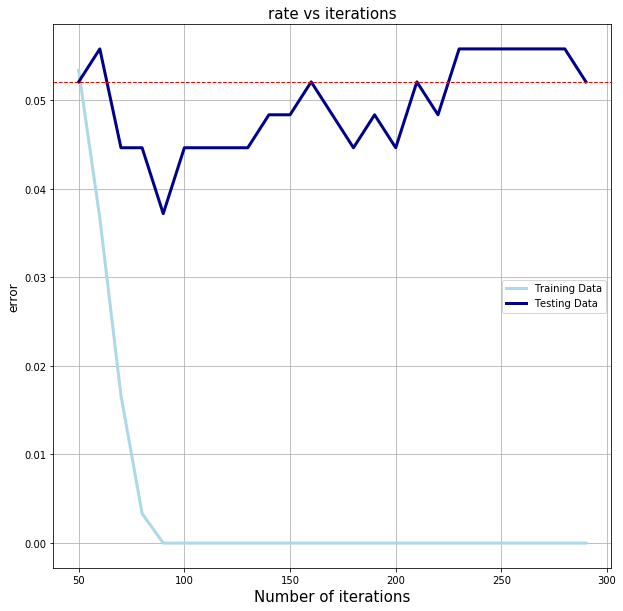

In [27]:
#plot the graph
plot(error_train, error_test)

## Standard SVM Implementation

In [28]:
#import the standard SVM classifier from the sklearn library
from sklearn.svm import SVC
#set the kernel as linear
svclassifier = SVC(kernel='linear')
#fit the training data
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
#do predictions
y_pred = svclassifier.predict(x_test)

In [30]:
#plot the confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[190  13]
 [  3  63]]
              precision    recall  f1-score   support

          -1       0.98      0.94      0.96       203
           1       0.83      0.95      0.89        66

    accuracy                           0.94       269
   macro avg       0.91      0.95      0.92       269
weighted avg       0.95      0.94      0.94       269



Thus on applying the Support Vector Classifier the accuracy obtained is 94%